In [1]:
import numpy as np
print("NumPy works!")

import matplotlib.pyplot as plt
print("Matplotlib works!")

import seaborn as sns
print("Seaborn works!")

import tensorflow as tf
print("TensorFlow works!")


NumPy works!
Matplotlib works!
Seaborn works!
TensorFlow works!


In [2]:
# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Print dataset shapes
print(f"Training set shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Labels shape: {y_test.shape}")


Training set shape: (60000, 28, 28), Labels shape: (60000,)
Test set shape: (10000, 28, 28), Labels shape: (10000,)


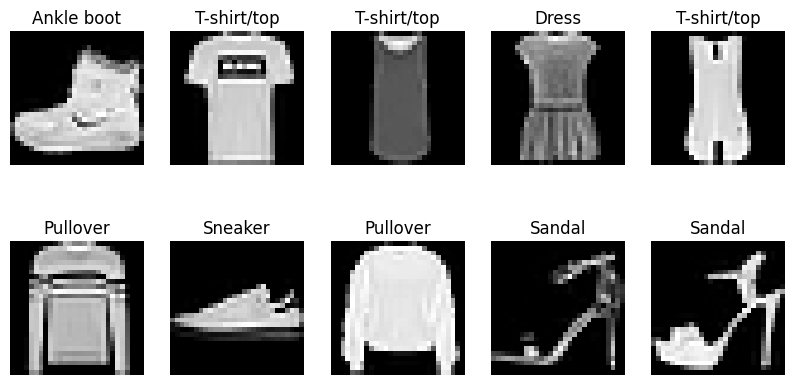

In [3]:
# Define class names for Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot 10 sample images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")  # Show image in grayscale
    plt.title(class_names[y_train[i]])  # Get label name
    plt.axis("off")
plt.show()


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Instead of a regular fully connected neural network, we will use a Convolutional Neural Network (CNN), which works better for images by detecting patterns like edges and textures.

🔹 Model Architecture
1. Convolutional Layer (Conv2D) – Extracts features from images.
2. Pooling Layer (MaxPooling2D) – Reduces image size while keeping important features.
3. Flatten Layer – Converts image data into a 1D array.
4. Fully Connected (Dense) Layers – Classifies images into 10 categories.
5. Softmax Activation – Outputs probabilities for each class.

In [5]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    # First Convolutional layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Second Convolutional layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Flatten layer (convert to 1D)
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(128, activation='relu'),
    
    # Output layer (10 classes, softmax activation)
    layers.Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()

/Users/roya/Documents/MLprojects/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7789 - loss: 0.6123 - val_accuracy: 0.8790 - val_loss: 0.3304
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8885 - loss: 0.3037 - val_accuracy: 0.8852 - val_loss: 0.3101
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9036 - loss: 0.2600 - val_accuracy: 0.9033 - val_loss: 0.2646
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9168 - loss: 0.2229 - val_accuracy: 0.9002 - val_loss: 0.2628
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9291 - loss: 0.1905 - val_accuracy: 0.9078 - val_loss: 0.2437
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9375 - loss: 0.1695 - val_accuracy: 0.9045 - val_loss: 0.2626
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9457 - loss: 0.1455 - val_accuracy: 0.9147 - val_loss: 0.2502
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9504 - loss: 0

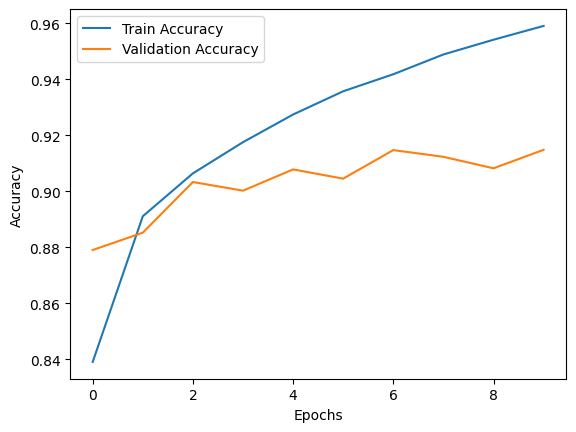

In [8]:
# Plot training & validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Analysis of Results
1. High Training Accuracy (96%) & High Validation Accuracy (91%)

The model is performing well and generalizing properly to the test set.
A small gap between training and validation accuracy is normal.

2. Validation Loss Stagnation (~0.28)

While accuracy is good, the validation loss is not decreasing consistently.
This suggests slight overfitting—the model is learning too much from training data and not generalizing as well to unseen data.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    Dropout(0.25),  # Dropout to prevent overfitting
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    Dropout(0.5),  # Larger dropout before final layer
    layers.Dense(10, activation='softmax')
])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True
)

datagen.fit(X_train.reshape(-1, 28, 28, 1))

In [13]:
# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=32),
                    epochs=10, 
                    validation_data=(X_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6016 - loss: 1.0743 - val_accuracy: 0.7843 - val_loss: 0.5408
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7595 - loss: 0.6365 - val_accuracy: 0.8192 - val_loss: 0.4676
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7849 - loss: 0.5715 - val_accuracy: 0.8484 - val_loss: 0.4110
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8021 - loss: 0.5271 - val_accuracy: 0.8525 - val_loss: 0.3914
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8127 - loss: 0.5001 - val_accuracy: 0.8641 - val_loss: 0.3740
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8179 - loss: 0.4862 - val_accuracy: 0.8675 - val_loss: 0.3523
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8221 - loss: 0.4771 - val_accuracy: 0.8776 - val_loss: 0.3368
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8282 - loss: 0

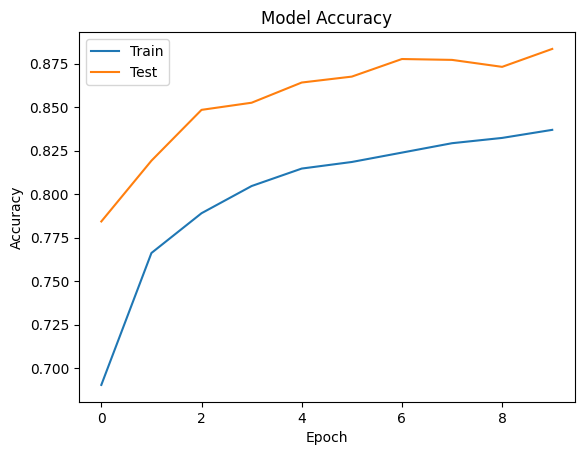

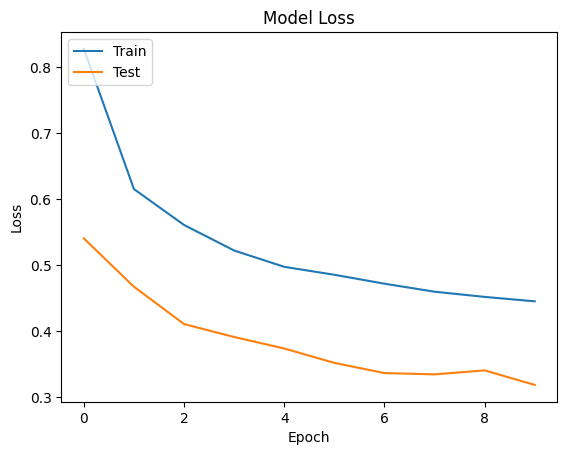

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout again
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Create the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the augmented data
history = model.fit(
    datagen.flow(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test.reshape(-1, 28, 28, 1), y_test),
    callbacks=[early_stopping]
)

/Users/roya/Documents/MLprojects/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/roya/Documents/MLprojects/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5397 - loss: 1.2336 - val_accuracy: 0.7630 - val_loss: 0.6065
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7178 - loss: 0.7440 - val_accuracy: 0.7870 - val_loss: 0.5605
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7508 - loss: 0.6671 - val_accuracy: 0.8087 - val_loss: 0.5149
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7737 - loss: 0.6084 - val_accuracy: 0.8204 - val_loss: 0.4780
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7870 - loss: 0.5801 - val_accuracy: 0.8149 - val_loss: 0.4962
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7989 - loss: 0.5442 - val_accuracy: 0.8362 - val_loss: 0.4502
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8031 - loss: 0.5335 - val_accuracy: 0.8334 - val_loss: 0.4464
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8085 - loss: 0

In [18]:
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Dropout(0.25),  # Add dropout here
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [19]:
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Learning rate scheduler
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.9  # Reduce learning rate by 10%

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train with the learning rate scheduler
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
                    callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8273 - loss: 0.4915 - val_accuracy: 0.8764 - val_loss: 0.3245 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9026 - loss: 0.2617 - val_accuracy: 0.8752 - val_loss: 0.3372 - learning_rate: 0.0010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9169 - loss: 0.2220 - val_accuracy: 0.9018 - val_loss: 0.2754 - learning_rate: 0.0010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9312 - loss: 0.1837 - val_accuracy: 0.8951 - val_loss: 0.2981 - learning_rate: 0.0010
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9409 - loss: 0.1575 - val_accuracy: 0.9024 - val_loss: 0.2809 - learning_rate: 0.0010
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9491 - loss: 0.1334 - val_accuracy: 0.9081 - val_loss: 0.2765 - learning_rate: 9.0000e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - ac

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9856 - loss: 0.0407 - val_accuracy: 0.9166 - val_loss: 0.3808
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9864 - loss: 0.0367 - val_accuracy: 0.9063 - val_loss: 0.4308
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9886 - loss: 0.0305 - val_accuracy: 0.9134 - val_loss: 0.4263
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9902 - loss: 0.0263 - val_accuracy: 0.9120 - val_loss: 0.4668


In [22]:
model = tf.keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

In [25]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [26]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.8041 - loss: 0.5467 - val_accuracy: 0.8588 - val_loss: 0.3864
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.8848 - loss: 0.3108 - val_accuracy: 0.8818 - val_loss: 0.3330
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9054 - loss: 0.2545 - val_accuracy: 0.8723 - val_loss: 0.3458
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9166 - loss: 0.2248 - val_accuracy: 0.8757 - val_loss: 0.3475
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9262 - loss: 0.1958 - val_accuracy: 0.9017 - val_loss: 0.2912
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9349 - loss: 0.1691 - val_accuracy: 0.8956 - val_loss: 0.3134
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9446 - loss: 0.1458 - val_accuracy: 0.9068 - val_loss: 0.3329
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9505 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


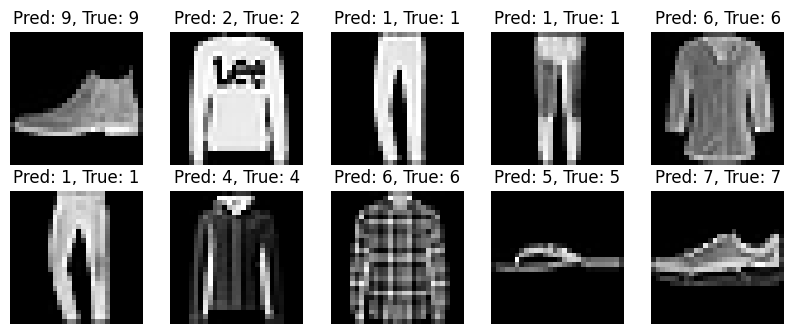

In [28]:

# Make predictions on the test set
predictions = model.predict(X_test)

# Display the first 10 predictions and their corresponding labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}, True: {y_test[i]}")
    plt.axis('off')
plt.show()

In [30]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8996 - loss: 0.4077
Test Accuracy: 90.21%
Test Loss: 0.3906


In [32]:
model.save('fashion_mnist_cnn_model.keras')